In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def tf(k,N):
    return np.exp((-1j*2*np.pi*k)/N)

tf(0,4)

(1+0j)

In [3]:
def fft(x):
    f = np.zeros_like(x,dtype=complex)
    for i in np.arange(len(f)):
        f[i]=fft_k(x,i) 
    return f

def fft_k(x,k):
    if(len(x)==1):
         return x[0]
    f= 0+0j
    x_even = x[::2]
    x_odd = x[1::2]
    
    fe= fft_k(x_even,k)
    fo = fft_k(x_odd,k)
    xfo= np.multiply(tf(k,len(x)) ,fo,dtype=complex)
    f=np.add(fe,xfo,dtype=complex)
    return f
    

<ipython-input-4-de7b781cd9da>:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq,abs(res))


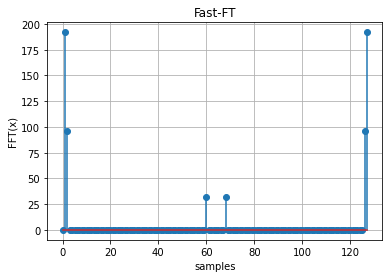

<ipython-input-4-de7b781cd9da>:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq,abs(res))


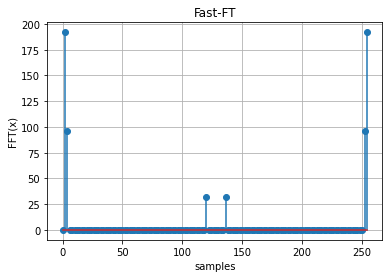

<Figure size 432x288 with 0 Axes>

In [4]:
slew_rate=128
ts = 1/slew_rate
t = np.arange(0,1,ts)
freq = 1
x = 3*np.sin(2*np.pi*freq*t)
freq = 2
x += np.sin(2*np.pi*freq*t)
freq = 2
x += 0.5*np.sin(2*np.pi*freq*t)
freq = 60
x += 0.5*np.sin(2*np.pi*freq*t)

res = fft(x)



T= len(x)/slew_rate
freq = np.arange(len(x))/T


plt.stem(freq,abs(res))
plt.title("Fast-FT")
plt.ylabel("FFT(x)")
plt.xlabel("samples")
plt.grid(True)
plt.show()
plt.savefig("e4_fft.pdf")



T= (len(x)//2)/slew_rate
freq = np.arange(len(x))/T


plt.stem(freq,abs(res))
plt.title("Fast-FT")
plt.ylabel("FFT(x)")
plt.xlabel("samples")
plt.grid(True)
plt.show()
plt.savefig("e4_fft.pdf")
